<a href="https://colab.research.google.com/github/Dolphuwadol/Steamlit-time-series/blob/master/(EDA_%2B_ARIMA)Prediction_Stock_Prices_on_the_SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get data and Visualize data

In [1]:
%%capture
!pip install starfishX
!pip install --upgrade pip
!pip install mplfinance
!pip install scipy
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import starfishX as sx
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

## Library for ARIMA Model
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error

%matplotlib notebook
%matplotlib inline

Load ข้อมูลหุ้น KBANK ย้อนหลังตั้งแต่วันที่ 19/08/1999 จนถึงปัจจุบัน




In [3]:
today = datetime.datetime.now().strftime('%Y-%m-%d')
symbol = 'KBANK'
df = sx.loadHistData_v2(symbol, start='1999-08-19', end=today)
df.reset_index(inplace=True)

In [4]:
# csv = 'BANPU_data.csv'
# BANPU.to_csv(csv)

In [5]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
#BANPU = pd.read_csv('BANPU_data.csv')

In [7]:
#df = df.drop('Unnamed: 0', axis=1)

In [8]:
#df.set_index('Date', inplace=True)
#df.reset_index(drop=False, inplace=True)

ข้อมูลราคาย้อนหลังหุ้น KBANK ตั้งแต่วันที่ 04/01/2000 จนถึงปัจจุบัน
* Date : ปี/เดือน/วัน
* Open : ราคาเปิด
* High : ราคาสูงสุด
* Low  : ราคาต่ำสุด
* Close : ราคาปิด
* Adj Close : ราคาที่หักทุกอย่างแล้วทั้งปันผล ฯลฯ ซึ่งจะใช้เป็นราคาดัชนีที่อ้างอิงผลการลงทุนได้
* Volume : ปริมาณการซื้อขาย





In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,44.25,44.75,44.0,44.50,28.315296,10659200
1,2000-01-05,42.25,43.00,41.5,41.75,26.565462,16305600
2,2000-01-06,42.00,42.00,40.5,40.75,25.929167,8241300
3,2000-01-07,41.25,43.00,41.0,42.75,27.201759,6058600
4,2000-01-10,43.75,44.25,42.5,42.75,27.201759,7774300
...,...,...,...,...,...,...,...
5924,2023-11-13,131.50,132.00,130.5,131.50,131.500000,6976700
5925,2023-11-14,132.00,133.00,131.5,132.00,132.000000,8217500
5926,2023-11-15,133.00,133.00,132.0,132.00,132.000000,11937900
5927,2023-11-16,132.50,132.50,131.5,132.00,132.000000,3640200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5929 non-null   datetime64[ns]
 1   Open       5929 non-null   float64       
 2   High       5929 non-null   float64       
 3   Low        5929 non-null   float64       
 4   Close      5929 non-null   float64       
 5   Adj Close  5929 non-null   float64       
 6   Volume     5929 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 324.4 KB


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5929.000000,5929.000000,5929.000000,5929.000000,5929.000000,5.929000e+03
mean,112.741348,113.881860,111.497301,112.685487,91.317222,9.221500e+06
std,64.679522,65.177764,64.132021,64.656434,57.718132,9.374375e+06
min,14.000000,14.250000,13.750000,14.000000,8.908182,0.000000e+00
25%,56.000000,56.500000,55.000000,56.000000,36.331406,4.138800e+06
50%,114.000000,115.500000,112.000000,114.000000,88.592995,6.680600e+06
75%,171.000000,173.000000,170.000000,171.000000,142.440674,1.109250e+07
max,251.000000,252.000000,249.000000,250.000000,205.898529,1.726078e+08


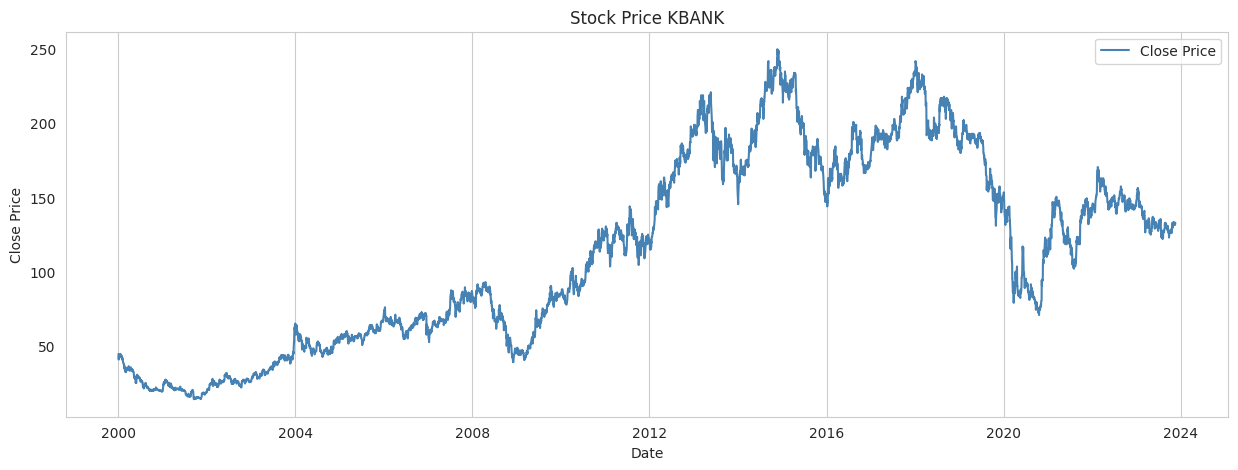

In [67]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='steelblue', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price KBANK')
plt.grid(axis='y')
plt.legend()
plt.show()


<ipython-input-68-0557cba1398c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close'], shade=True, color='blue', label='KDE Plot')


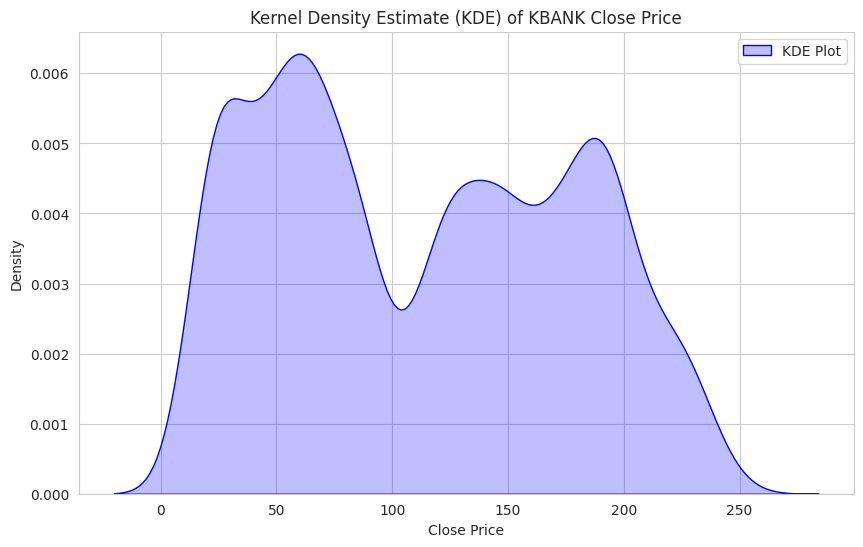

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


sns.kdeplot(df['Close'], shade=True, color='blue', label='KDE Plot')

plt.title('Kernel Density Estimate (KDE) of KBANK Close Price')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()
plt.show()

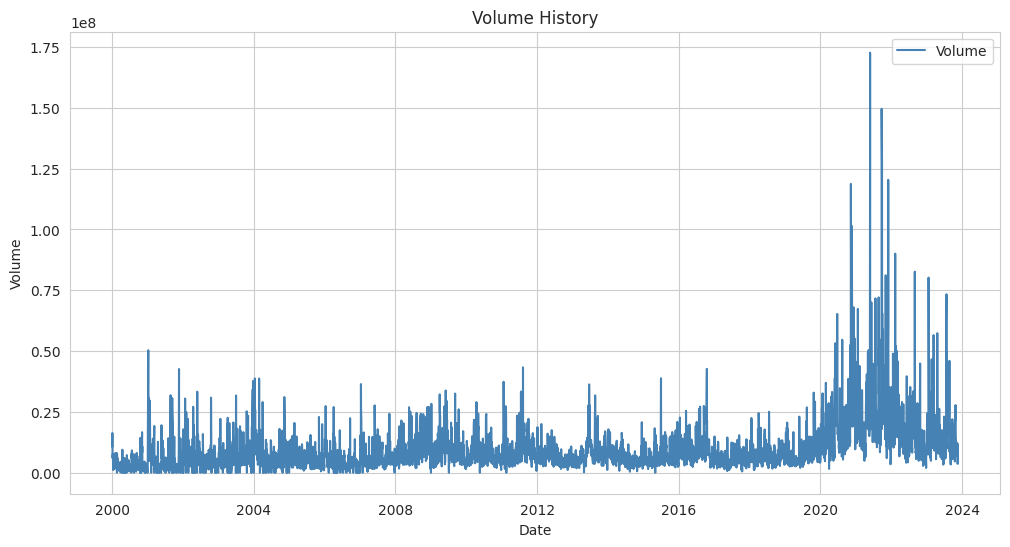

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df['Date'], y='Volume', color='steelblue', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume History')
plt.legend()
plt.grid(True)
plt.show()

2.1 Feature Extraction
ทำ Technical Analysis ได้แก่ MACD, EMA และ RSI



เพื่อประกอบการตัดสินใจในการเลือกหุ้น

MACD (Moving Average Convergence Divergence)
* ถ้าเส้น MACD อยู่บนเส้น Signal (Cross Above): สัญญาณที่บอกว่าตลาดน่าจะขึ้น
* ถ้าเส่น MACD อยู่ใต้เส้น Signal (Cross Below): สัญญาณที่บอกว่าตลาดน่าจะลง

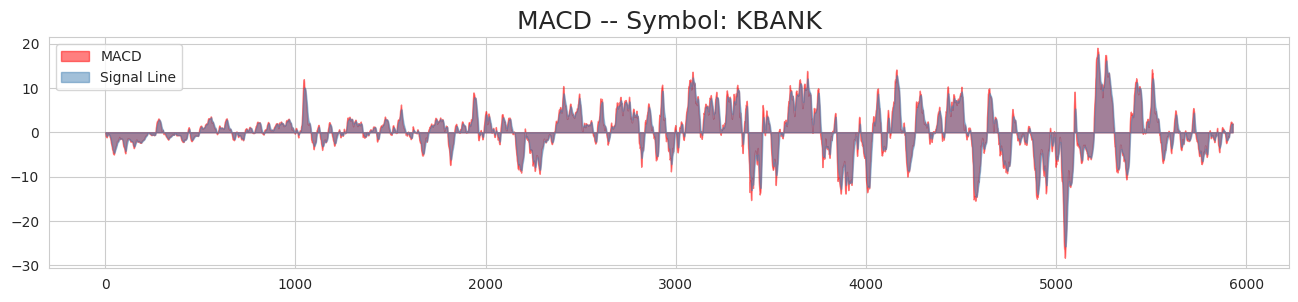

In [69]:
data = df[['Date', 'Close']]
ShortEMA = data.Close.ewm(span=10, adjust=False).mean()
LongEMA = data.Close.ewm(span=50, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(16, 3))
plt.title('MACD -- Symbol: KBANK', fontsize=18)
plt.fill_between(data.index, MACD, color='red', alpha=0.5, label='MACD')
plt.fill_between(data.index, signal, color='steelblue', alpha=0.5, label='Signal Line')
plt.legend(loc='upper left')
plt.show()

RSI(Relative strength index)

ใช้สำหรับวัดค่าการแกว่งตัวของราคาว่าซื้อหรือขายมากไปหรือไม่ ซึ่งเทียบเป็นช่วง 0–100 และมีค่ามาตรฐานอยู่ที่ 30 และ 70

ถ้า RSI อยู่ในระดับตํ่ากว่า 30 แนะนำให้ซื้อ เพราะราคาต่ำเกินไป หรือ ขายมากเกินไป (Oversold)

แต่ถ้ามากกว่า 70 แนะนำให้ขาย เพราะราคาสูงเกินไป หรือ ซื้อมากเกินไป (Overbought)

> Indented block



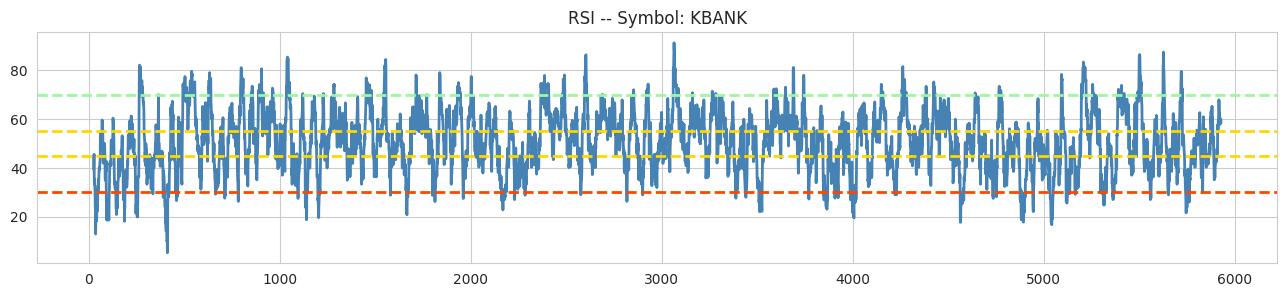

In [70]:
df_diff = data['Close'].diff(1)
df_diff = df_diff.dropna()
up = df_diff.copy()
down = df_diff.copy()
up[up<0] = 0
down[down>0] = 0
AVG_Gain = up.rolling(window= 25).mean()
AVG_Loss = abs(down.rolling(window=25).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0+RS))

new_df = pd.DataFrame()
new_df['Close'] = data['Close']
new_df['RSI'] = RSI
new_df

plt.figure(figsize=(16,3))
plt.title('RSI -- Symbol: KBANK')
plt.plot(new_df.index, new_df['RSI'], color = 'steelblue', linewidth = 2)
plt.axhline(30, linestyle='--', alpha = 1, color='orangered', linewidth = 2)
plt.axhline(45, linestyle='--', alpha = 1, color='gold', linewidth = 2)
plt.axhline(55, linestyle='--', alpha = 1, color='gold', linewidth = 2)
plt.axhline(70, linestyle='--', alpha = 1, color='palegreen', linewidth = 2)
plt.show()

### ARIMA Model(Auto Regressive Integrated Moving Average)

- AR = Auto Regressive
- I =Integrated
- MA = Moving Average

ARIMA(p,d,q)

- p = order ของโมเดล AR(p)
- d = จำนวนการ diff ทั้งหมด ไม่นับ seasonal diff
- q = order ของโมเดล MA(q)

In [48]:
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df

,Date,Close
0,2000-01-04,44.50
1,2000-01-05,41.75
2,2000-01-06,40.75
3,2000-01-07,42.75
4,2000-01-10,42.75
...,...,...
5924,2023-11-13,131.50
5925,2023-11-14,132.00
5926,2023-11-15,132.00
5927,2023-11-16,132.00


In [ ]:
#df = df.set_index('Date').sort_index()
#df_train = df[:'2016-01-01']
#df_test = df['2023-09-21' :]

In [49]:
train_ratio = 0.7
test_ratio = 0.3
start_date = '2000-01-04'
end_date = '2023-09-22'

In [50]:
total_data = len(df)
train_size = int(total_data * train_ratio)
test_size = total_data - train_size
df_train = df[:train_size]
df_test = df[train_size:]

In [51]:
print("Train data: ",df_train.shape)
print("Test data: ",df_test.shape)

Train data:  (4150, 2)
Test data:  (1779, 2)


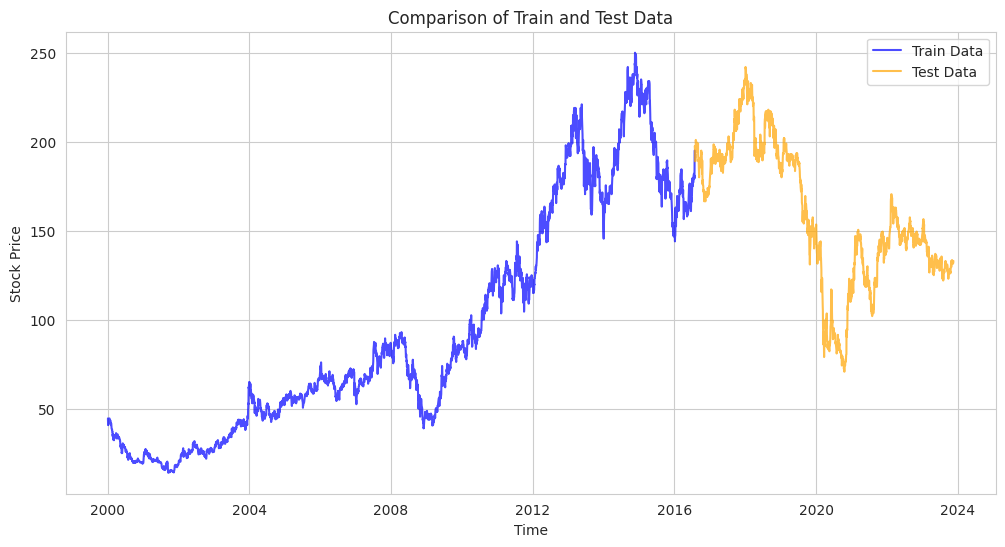

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['Date'],df_train['Close'], label='Train Data', color='blue', alpha=0.7)
plt.plot(df_test['Date'],df_test['Close'], label='Test Data', color='orange', alpha=0.7)

plt.title('Comparison of Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


- 1.หา Integrated (d) และ Stationary analysis(ทดสอบความคงที่ของข้อมูล)

* ทดสอบ Stationary(คือข้อมูลที่มีค่า Mean และ Variance คงที่เมื่อเวลาผ่านไป)


Stationary ข้อมูลจะคงที่ หรือ “ถ้าเราสุ่มข้อมูลออกมา 2 ครั้งจากบน Time Series จะต้องได้กราฟหน้าตาเหมือนกันเพราะฉะนั้นต้องไม่มี Trend หรือ Seasonality”

In [53]:
#Augmented Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df_train['Close'], autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

p-Values:0.9154894940173608


p-Values ไม่ผ่าน 0.05 ข้อมูลยังเป็น Unit-root (Non-stationary)

ต้องปรับข้อมูลก่อนโดยการทำ Differencing

คือการลบค่าของข้อมูลในช่วงเวลาก่อนหน้าออกจากค่าของช่วงเวลาปัจจุบัน



<ipython-input-71-e788038abd77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Close_diff'] = df_train['Close'].diff(1)


p-Values:2.5599938805756115e-25


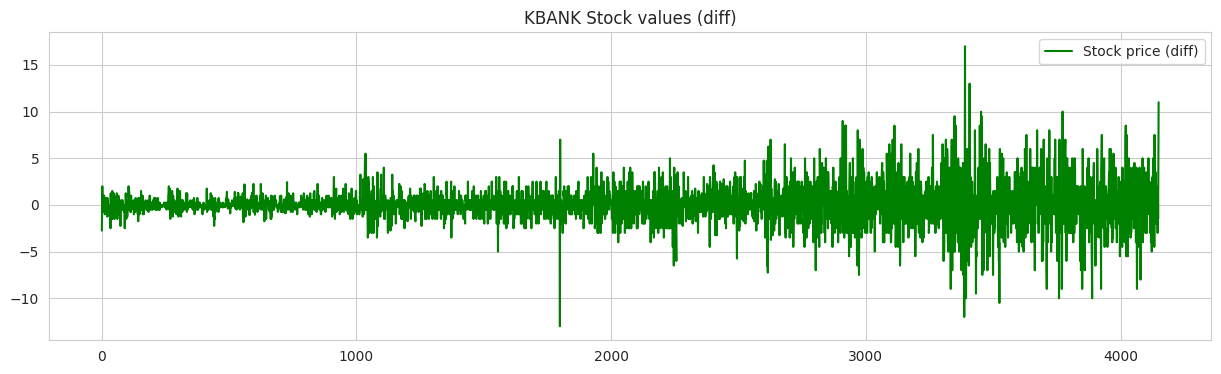

In [71]:
#First difference
df_train['Close_diff'] = df_train['Close'].diff(1)
df_train['Close_diff'].plot(color = 'green', figsize = (15,4))
plt.legend(['Stock price (diff)'])
plt.title('KBANK Stock values (diff)')

adf_res = adfuller(df_train['Close_diff'].dropna(), autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

#time series ที่ Stationary ข้อมูลจะคงที่

ดังนั้น Formation ที่ใช้ทำโมเดลต่อไปคือรูปแบบของ First difference ที่มีค่า d = 1

- 2.หา AR (p) ด้วย Partial Autocorrelation Function

AR คือ lag time หรือ ค่า ณ วันนี้มีความสัมพันธ์กับค่าที่เกิดขึ้นมาแล้วจากอดีต ณ ช่วงเวลาใดเวลาหนึ่ง

PACF คือ หาค่า Correlation ของข้อมูลและ lag time ของตัวมันเอง

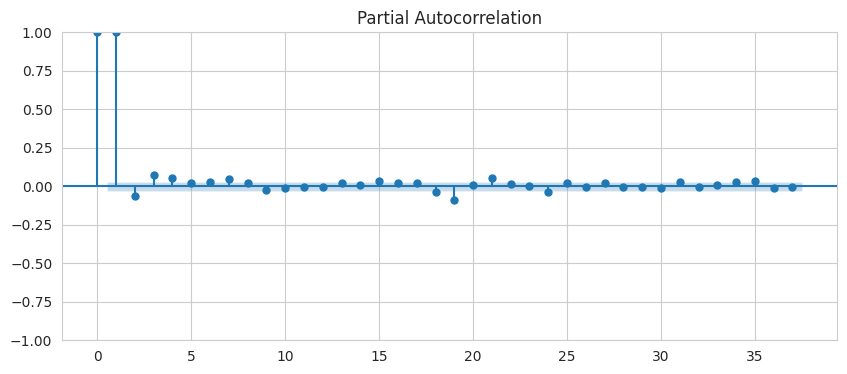

In [55]:
#Auto Regressive (p)
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.tsa.stattools import pacf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_pacf(df_train['Close'].dropna(), method = 'ols')
df_pacf = pacf(df_train['Close'].dropna(), method = 'ols')

หาจุดตัดตาม Confidence interval ที่ 95% ค่า z จะอยู่ที่ 1.96

In [56]:
for i in range(0, len(df_pacf)):
    if df_pacf[i] < 1.96 / np.sqrt(len(df_train['Close'])):
        print('p= ', i - 1)
        break

p=  1


- 3.หา MA (q) ด้วย Autocorrelation Function

MA คือ lag time ของ Error

ACF คือ หาค่า Correlation ระหว่างข้อมูล และ lag time ของตัวมันเอง

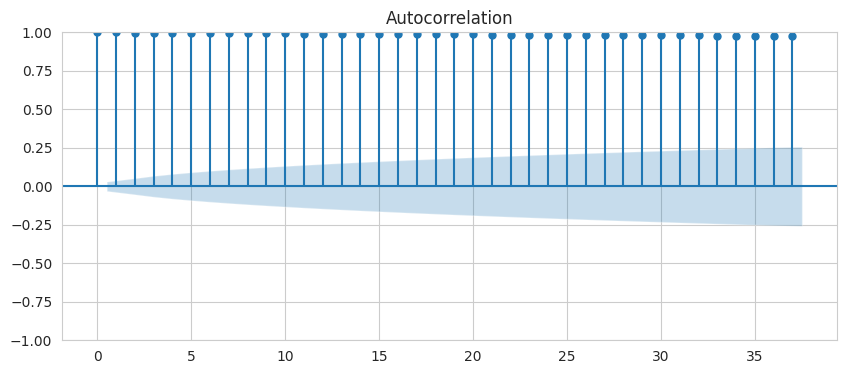

In [57]:
#Moving Average (q)
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.tsa.stattools import acf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_acf(df_train['Close'], fft = True)
df_acf = acf(df_train['Close'], fft = True)

In [58]:
 for i in range(0, len(df_acf)):
  if df_acf[i] < 1.96 / np.sqrt(len(df_train['Close'])):
    print(f'q = {i - 1}')
  else:
    print('Cannot be found')
    break

Cannot be found


- 4.Optimum Order(p,d,q) ด้วย AIC

ตอนนี้ p=1 , d=1 , q=ยังหาไม่ได้



In [59]:
# Test order
p = range(1, 2) #1
d = range(1, 2) #1
q = range(0, 3) #ไม่รู้
pdq = list(itertools.product(p, d, q))
print(f'Possible of q: {pdq}')

Possible of q: [(1, 1, 0), (1, 1, 1), (1, 1, 2)]


In [60]:
aic = []

for param in pdq:
    try:
        model = sm.tsa.arima.ARIMA(df_train['Close'].dropna(), order = param)
        results = model.fit()
        print('Order = {}'.format(param))
        print('AIC = {}'.format(results.aic))
        a = 'Order: '+str(param) +' AIC: ' + str(results.aic)
        aic.append(a)
    except Exception as e:
        print('Error occurred: ', str(e))
    continue


Order = (1, 1, 0)
AIC = 17730.66246049702
Order = (1, 1, 1)
AIC = 17724.330595308893
Order = (1, 1, 2)
AIC = 17695.091265397386


AIC ที่ต่ำที่สุดมีค่า 17695.0912 จาก Order(1,1,2)

- 5.Arima Model

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model = sm.tsa.arima.ARIMA(df_train['Close'], order = (1, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4150
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8843.546
Date:                Mon, 20 Nov 2023   AIC                          17695.091
Time:                        03:54:44   BIC                          17720.414
Sample:                             0   HQIC                         17704.051
                               - 4150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6708      0.061     11.003      0.000       0.551       0.790
ma.L1         -0.6115      0.061     -9.975      0.000      -0.732      -0.491
ma.L2         -0.1132      0.010    -11.236      0.0

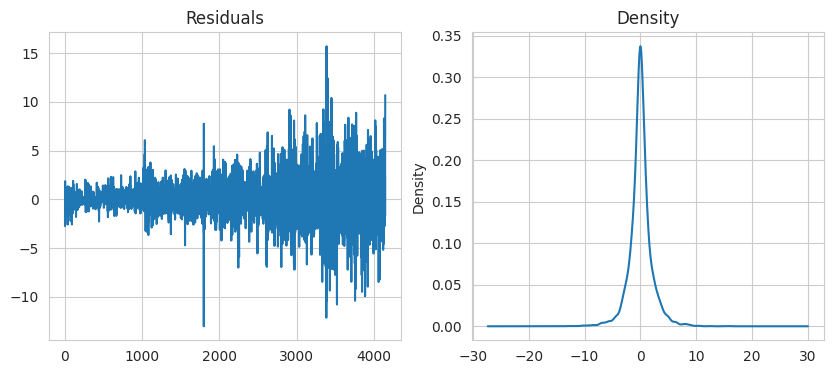

In [62]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

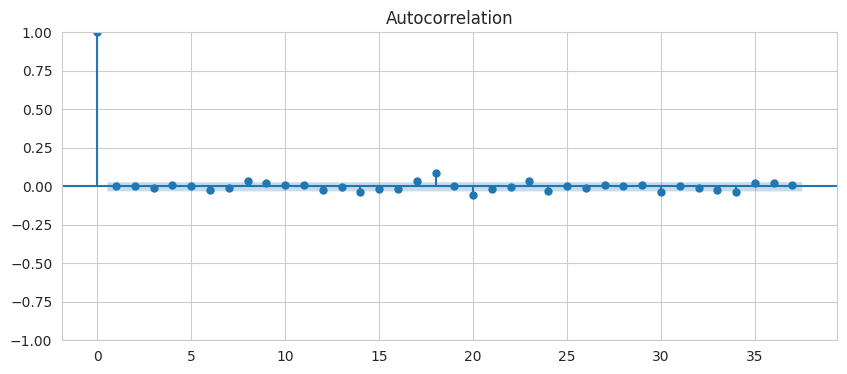

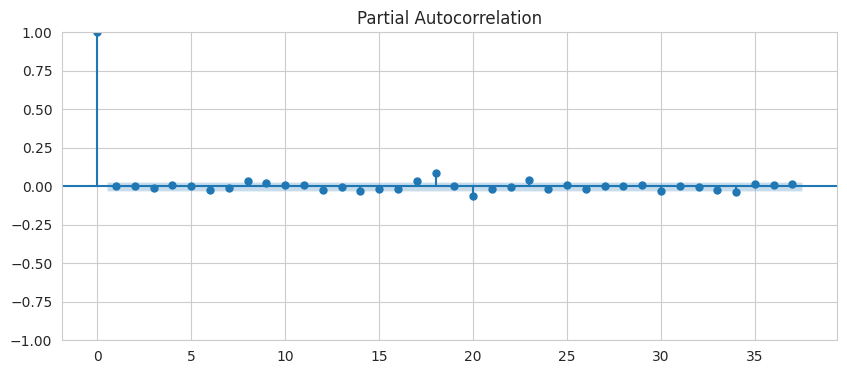

In [63]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [64]:
model_fit.predict(start=1, end=24, exog=None, dynamic=False)

1     44.500011
2     41.583094
3     40.890929
4     43.053826
5     42.725601
6     41.974186
7     42.596199
8     42.234410
9     43.339116
10    43.454388
11    44.513236
12    44.389730
13    44.434068
14    43.387915
15    43.537203
16    42.980424
17    42.784027
18    43.591349
19    43.474806
20    42.700482
21    42.801774
22    41.981603
23    40.755431
24    41.687205
Name: predicted_mean, dtype: float64

## Auto-fit the ARIMA model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17745.600, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17731.511, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17729.059, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17744.895, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17725.155, Time=2.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17694.743, Time=3.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17712.011, Time=1.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17696.706, Time=3.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17696.712, Time=4.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17695.262, Time=2.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=17703.234, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17698.677, Time=5.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17694.527, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17724.331, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0

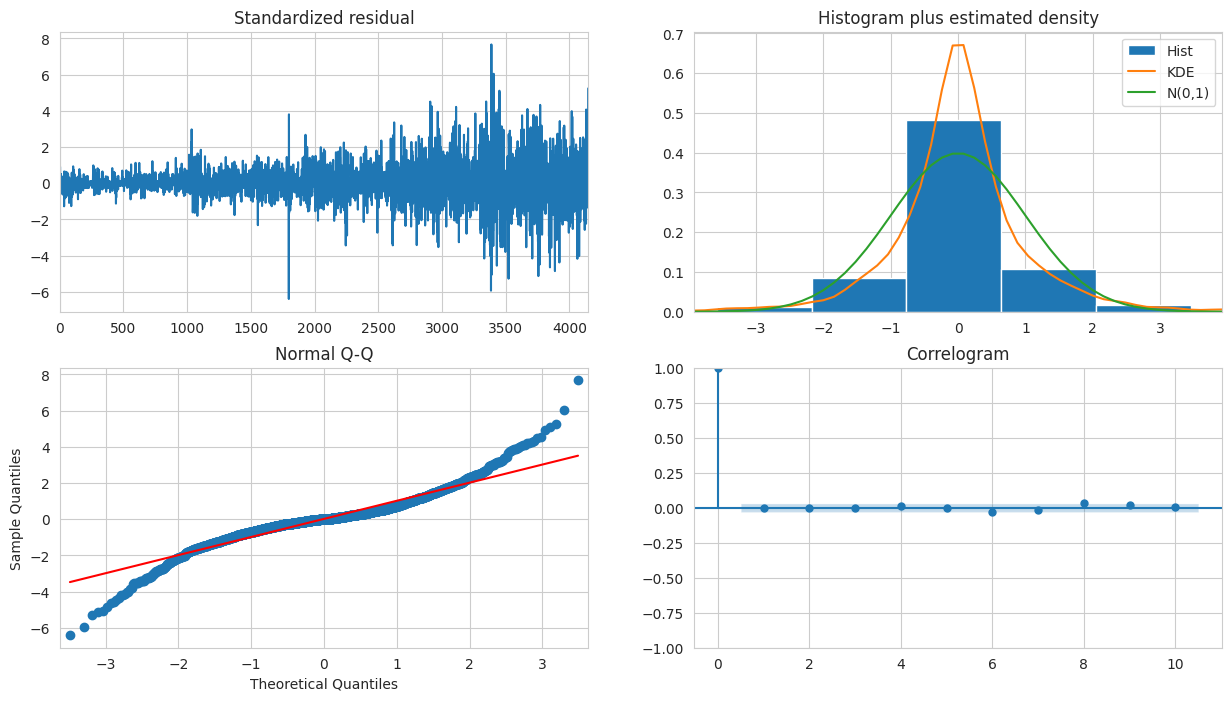

In [65]:
model_autoARIMA = auto_arima(df_train['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

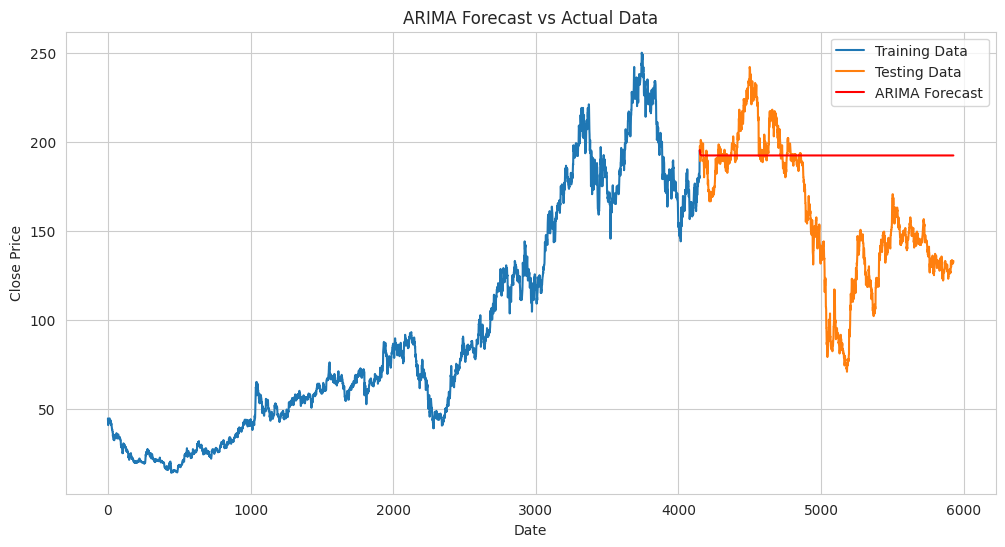

In [66]:
forecast = model_fit.forecast(steps=len(df_test))
plt.figure(figsize=(12, 6))
plt.plot(df_train['Close'], label='Training Data')
plt.plot(df_test['Close'], label='Testing Data')
plt.plot(df_test.index, forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()